### Daniel Shin - Pandas Challenges

In [1]:
# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read 2013_movies.csv file

movies = pd.read_csv("2013_movies.csv")

In [3]:
# change ReleaseDate column to a datetime object

movies = movies.sort("ReleaseDate")
movies["ReleaseDate"] = movies["ReleaseDate"].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S"))

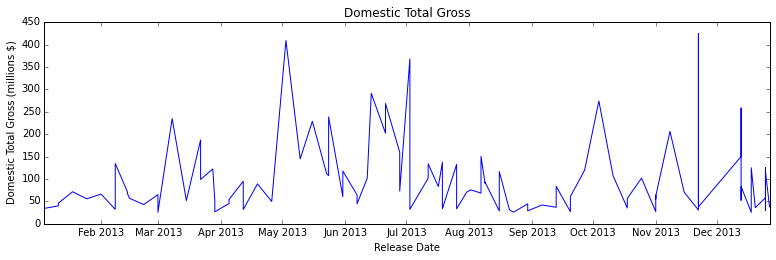

In [4]:
# create a plot of Domestic Total Gross over time

figure(figsize=(13,4)).autofmt_xdate()
plt.plot(movies.ReleaseDate, movies.DomesticTotalGross)
plt.xlabel("Release Date")
plt.ylabel("Domestic Total Gross (millions $)")
plt.title("Domestic Total Gross")
locs, label = yticks()
yticks(locs, map(lambda x: "%d" % x, locs/1e6))
plt.show()

In [5]:
# Average runtime of movies, grouped by rating

group_avg = movies.groupby("Rating").mean()
group_avg.columns = ["Budget ($)", "DomesticTotalGross ($)", "Runtime (min)"]
group_avg.iloc[:,1:3] = group_avg.iloc[:,1:3].astype(int)
group_avg.iloc[:,1:3]

,DomesticTotalGross ($),Runtime (min)
Rating,,
G,268492764,107
PG,131135716,99
PG-13,111449769,117
R,69892429,110


In [8]:
# group movies by Rating

groups = movies.groupby("Rating")

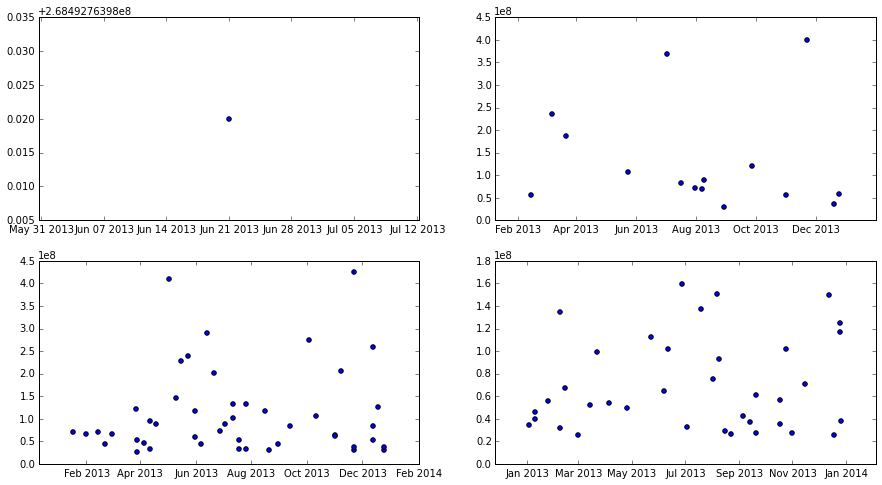

In [9]:
# Domestic Total Gross vs Release Date for each Rating

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, sharey=False, figsize = (15,8))
ax1.scatter(x = groups.get_group("G")["ReleaseDate"].values, y = groups.get_group("G")["DomesticTotalGross"].values)
ax2.scatter(x = groups.get_group("PG")["ReleaseDate"].values, y = groups.get_group("PG")["DomesticTotalGross"].values)
ax3.scatter(x = groups.get_group("PG-13")["ReleaseDate"].values, y = groups.get_group("PG-13")["DomesticTotalGross"].values)
ax4.scatter(x = groups.get_group("R")["ReleaseDate"].values, y = groups.get_group("R")["DomesticTotalGross"].values)

In [10]:
# find the director with the highest gross per movie

groups_director = movies.groupby("Director")
mean_by_director = groups_director.mean()
max_dtg = max(mean_by_director["DomesticTotalGross"])
mean_by_director[mean_by_director["DomesticTotalGross"] == max_dtg]

,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000,424668047,146


In [15]:
# create new column with only month of Release

movies["ReleaseMonth"] = movies["ReleaseDate"].apply(lambda y: y.month)

In [16]:
# find mean and standard deviation of numerical categories, after being grouped by Release Month

group_by_month = movies.groupby("ReleaseMonth").mean()
errors = movies.groupby("ReleaseMonth").std()

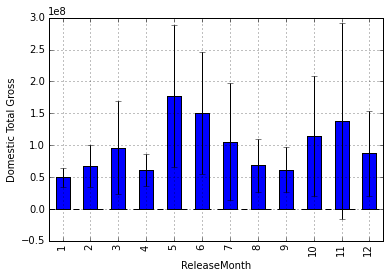

In [17]:
# create a bar plot of average domestic total gross by month with error bars

group_by_month["DomesticTotalGross"].plot(kind="bar", yerr = errors)\
    .set_ylabel("Domestic Total Gross")
